# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [139]:
! pip install Pillow

In [140]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [141]:
! git clone https://github.com/vcasadei/MNIST.git

fatal: destination path 'MNIST' already exists and is not an empty directory.


In [142]:
!ls MNIST

processed  raw


In [143]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos 10000 amostras de treinamento.

In [144]:
x_train = x_train.float()

x_train = x_train / 255.

print(x_train.size())

if True:
    n_samples_train = 10000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

torch.Size([60000, 28, 28])
Amostras de treinamento: 10000

Dimensões dos dados das imagens:    torch.Size([10000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

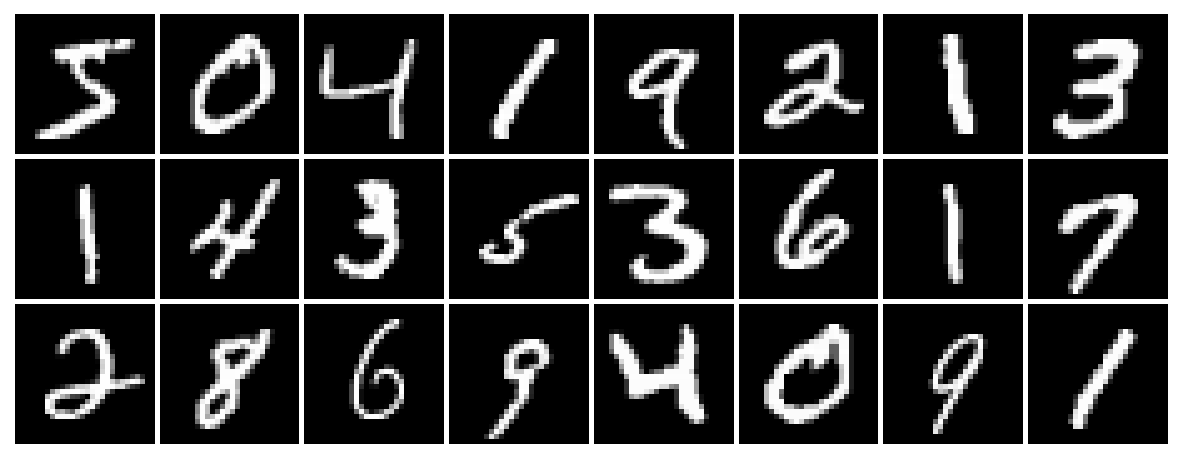

In [145]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


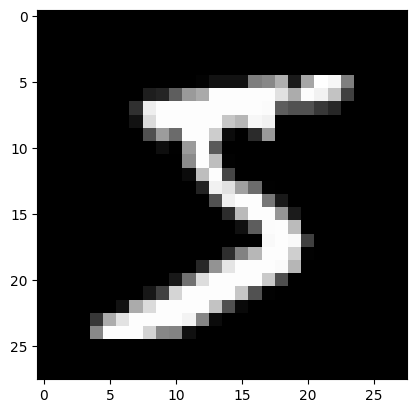

In [146]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [147]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na saída

### Testando um predict com poucas amostras

In [148]:
xin = x_train[:5].view(-1,28*28)
score = model(xin)
score

tensor([[-0.1508,  0.0037,  0.0055, -0.2592,  0.2966,  0.1133,  0.1116,  0.4614,
         -0.2642,  0.2081],
        [-0.2512, -0.0379,  0.0499,  0.1982,  0.4747,  0.2822,  0.2226,  0.4575,
         -0.4695,  0.1009],
        [ 0.0477, -0.2002,  0.2573,  0.1035,  0.3519,  0.1414,  0.0417,  0.1810,
         -0.0826, -0.0725],
        [-0.0724, -0.0490,  0.1581,  0.0283,  0.3610,  0.1385,  0.0563, -0.0581,
         -0.1979, -0.0214],
        [ 0.0413, -0.1640, -0.0350,  0.0295,  0.3605, -0.0950,  0.2308,  0.1872,
         -0.2118, -0.0828]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [149]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [150]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-panufyrn
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-panufyrn
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done


In [151]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(x_train.view(-1,28*28))
loss = criterion(y_pred, y_train)
loss

tensor(2.3405, grad_fn=<NllLossBackward0>)

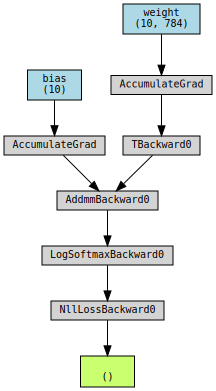

In [152]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

Epoch[1/100] | Loss: 2.340490 | Accuracy: 0.125700


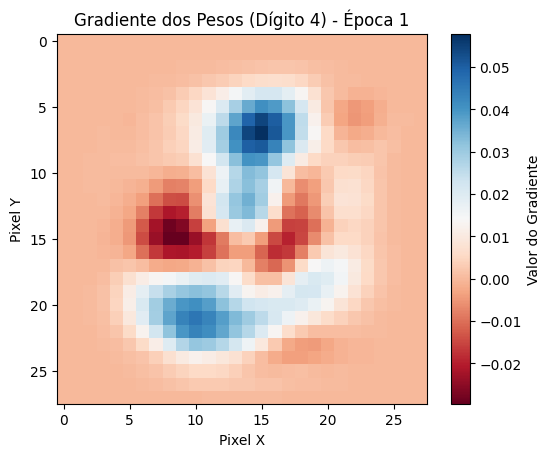

Epoch[2/100] | Loss: 1.847557 | Accuracy: 0.518200


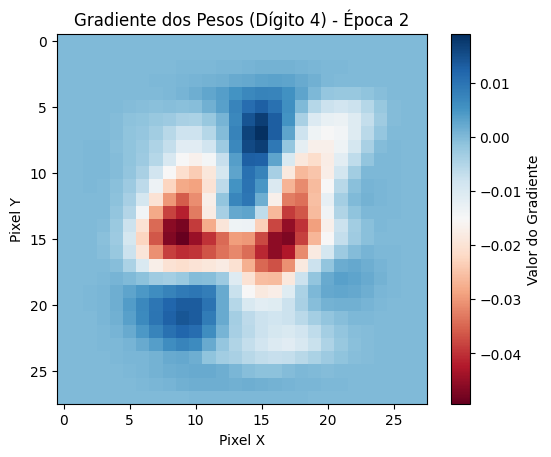

Epoch[3/100] | Loss: 1.521799 | Accuracy: 0.709800


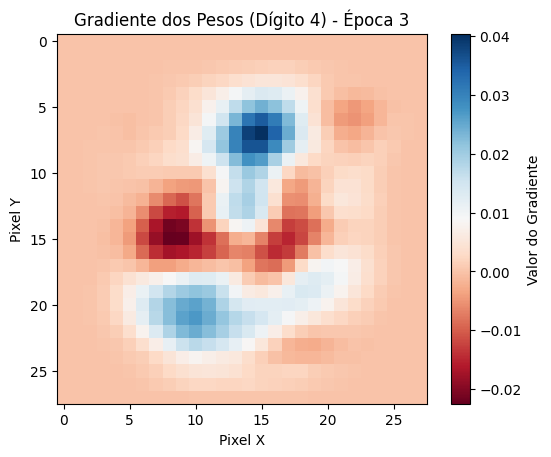

Epoch[4/100] | Loss: 1.298043 | Accuracy: 0.760800


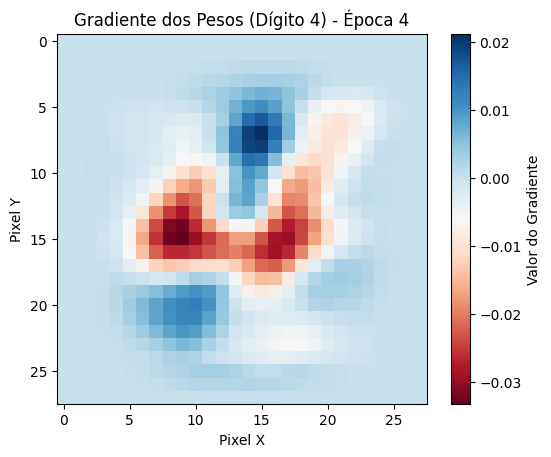

Epoch[5/100] | Loss: 1.148495 | Accuracy: 0.785600


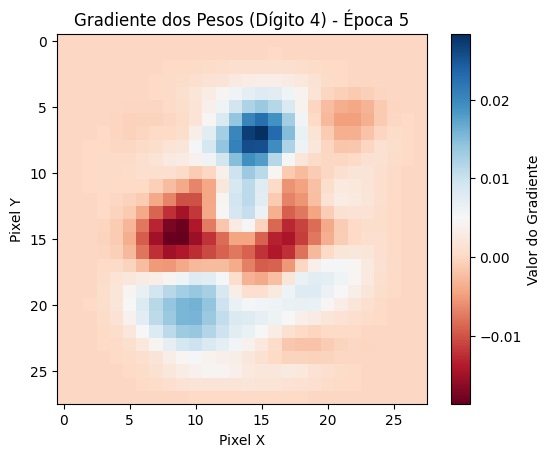

Epoch[6/100] | Loss: 1.033484 | Accuracy: 0.808000


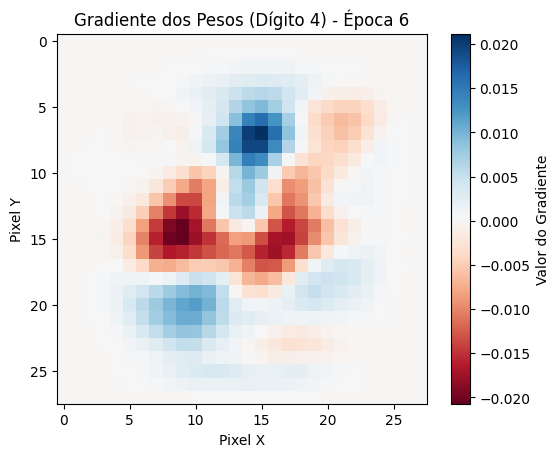

Epoch[7/100] | Loss: 0.951808 | Accuracy: 0.816700


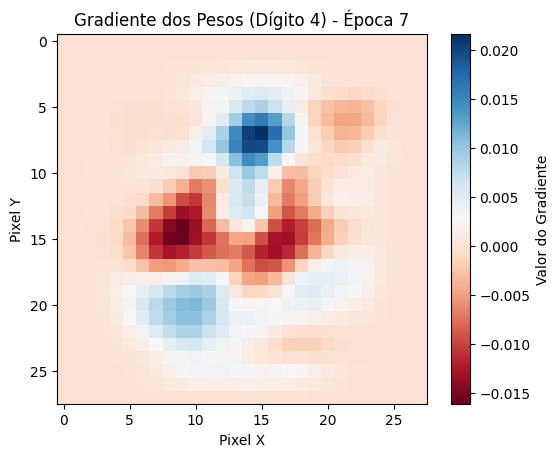

Epoch[8/100] | Loss: 0.887432 | Accuracy: 0.830200


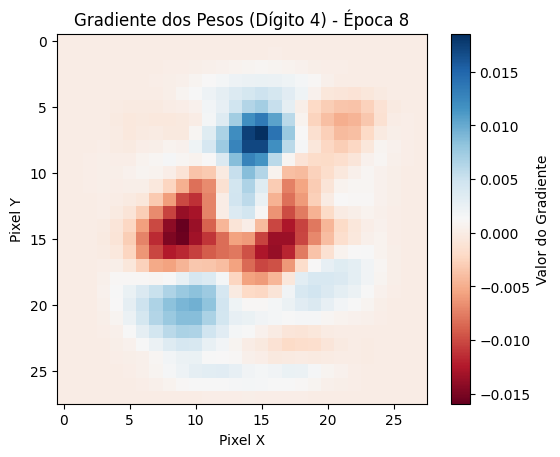

Epoch[9/100] | Loss: 0.837317 | Accuracy: 0.831800


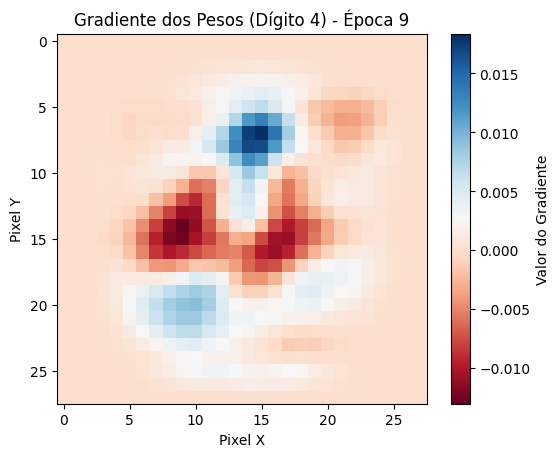

Epoch[10/100] | Loss: 0.795180 | Accuracy: 0.842800


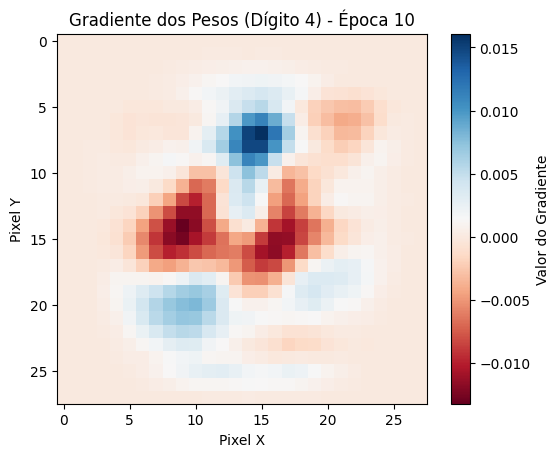

Epoch[11/100] | Loss: 0.760496 | Accuracy: 0.845400


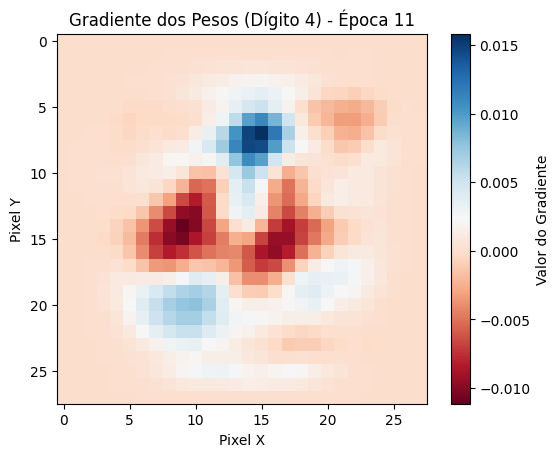

Epoch[12/100] | Loss: 0.730713 | Accuracy: 0.849900


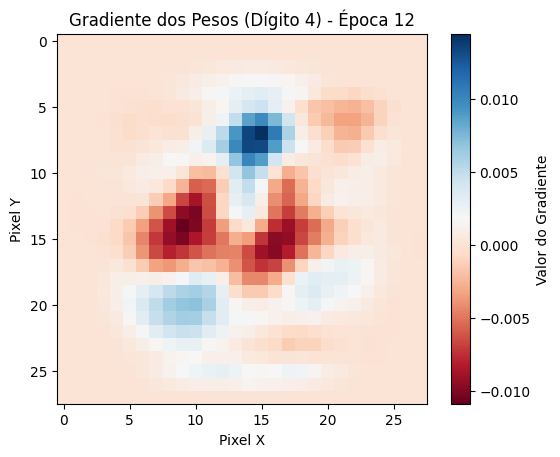

Epoch[13/100] | Loss: 0.705248 | Accuracy: 0.852600


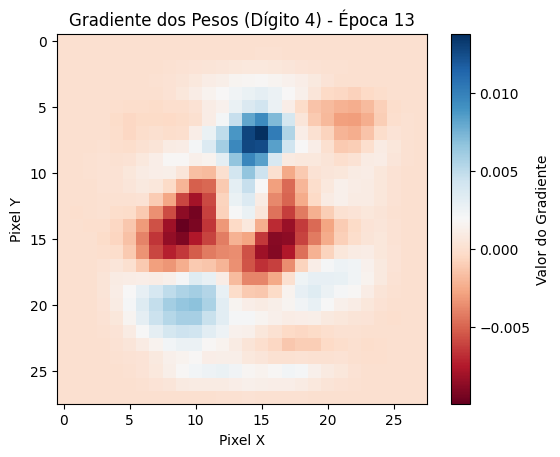

Epoch[14/100] | Loss: 0.683016 | Accuracy: 0.855800


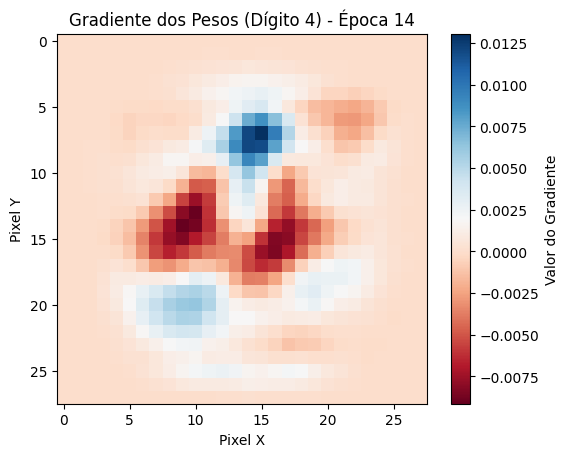

Epoch[15/100] | Loss: 0.663458 | Accuracy: 0.858400


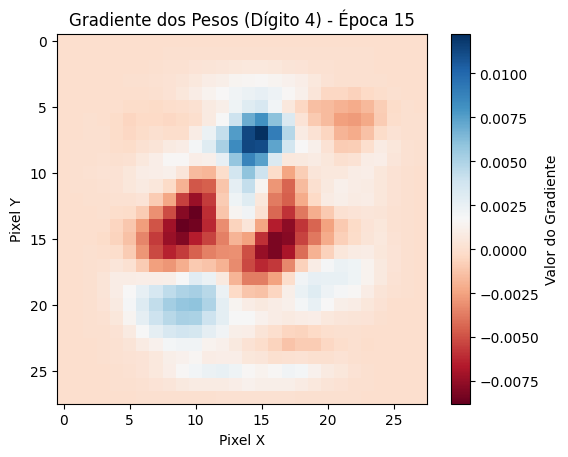

Epoch[16/100] | Loss: 0.646055 | Accuracy: 0.860000


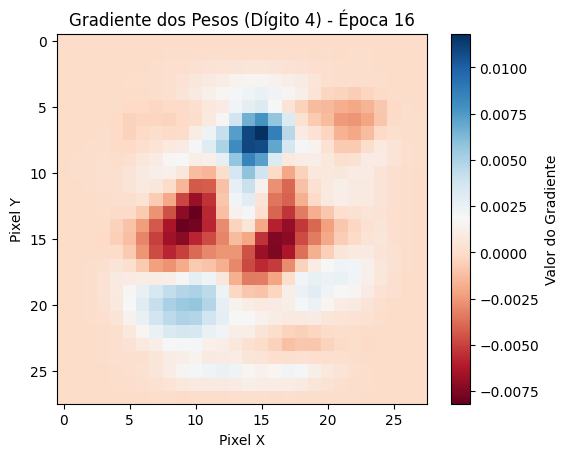

Epoch[17/100] | Loss: 0.630442 | Accuracy: 0.861900


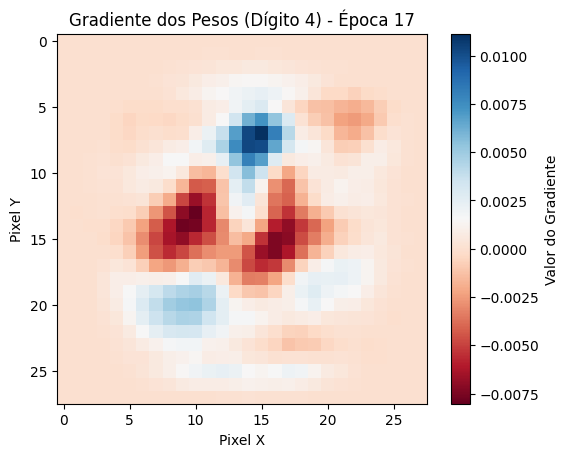

Epoch[18/100] | Loss: 0.616333 | Accuracy: 0.864500


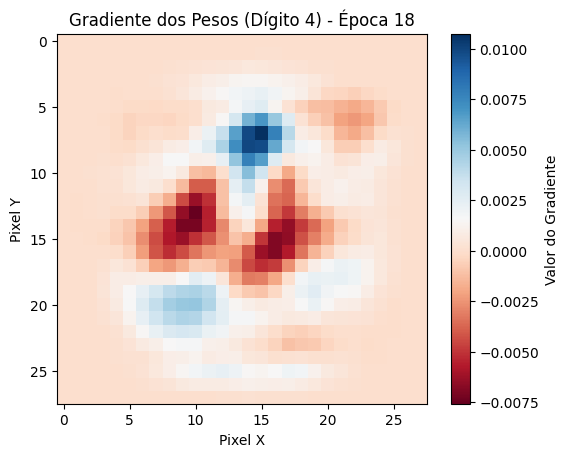

Epoch[19/100] | Loss: 0.603503 | Accuracy: 0.866100


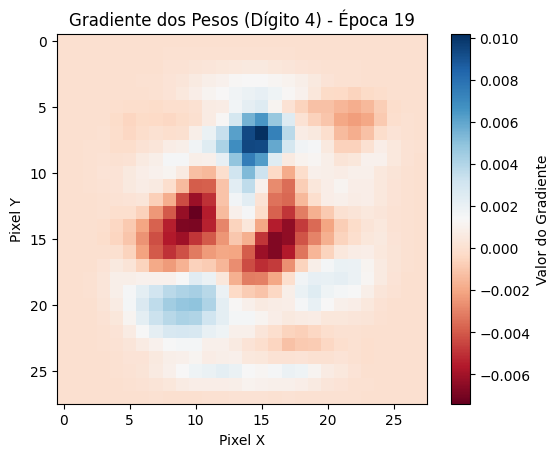

Epoch[20/100] | Loss: 0.591773 | Accuracy: 0.867700


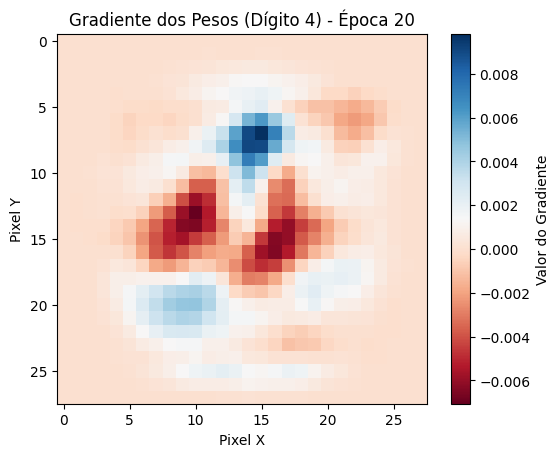

Epoch[21/100] | Loss: 0.580997 | Accuracy: 0.868300


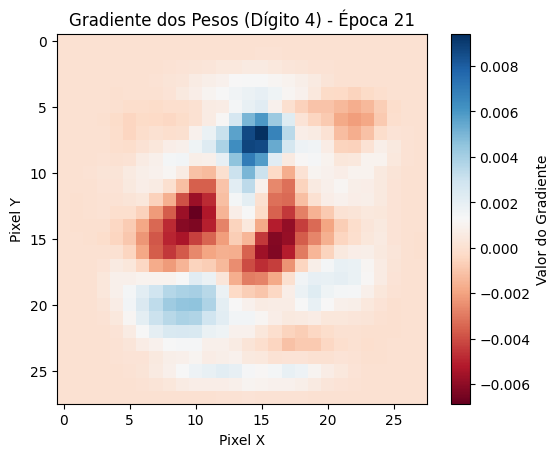

Epoch[22/100] | Loss: 0.571057 | Accuracy: 0.869300


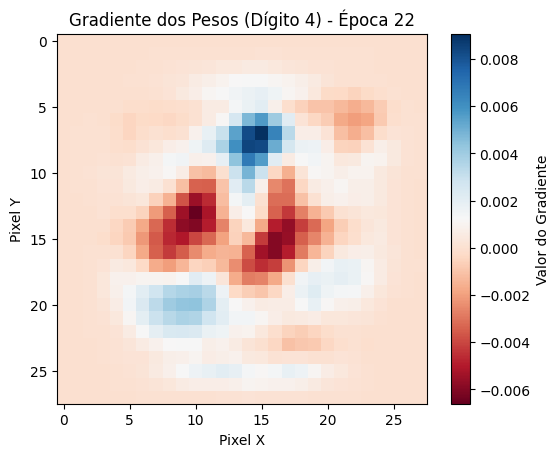

Epoch[23/100] | Loss: 0.561851 | Accuracy: 0.870600


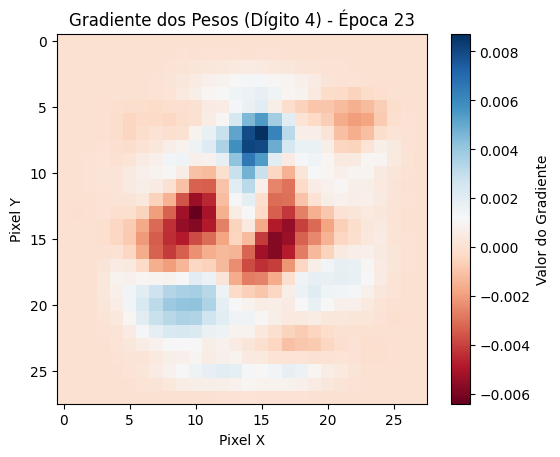

Epoch[24/100] | Loss: 0.553294 | Accuracy: 0.871400


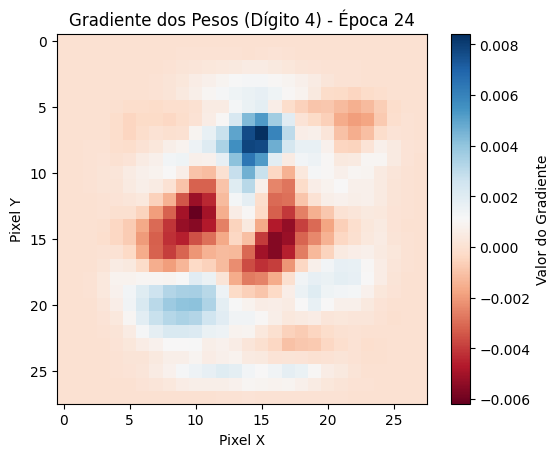

Epoch[25/100] | Loss: 0.545316 | Accuracy: 0.872400


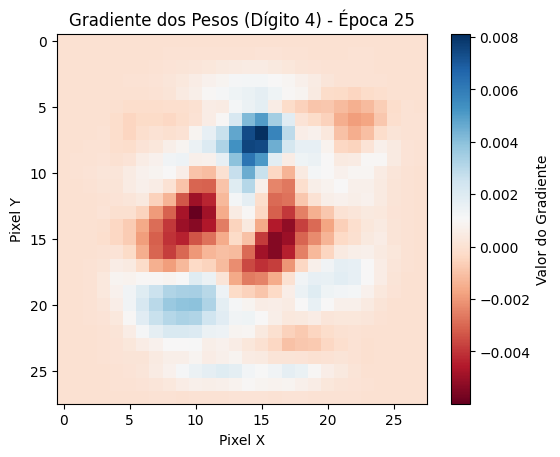

Epoch[26/100] | Loss: 0.537855 | Accuracy: 0.874200


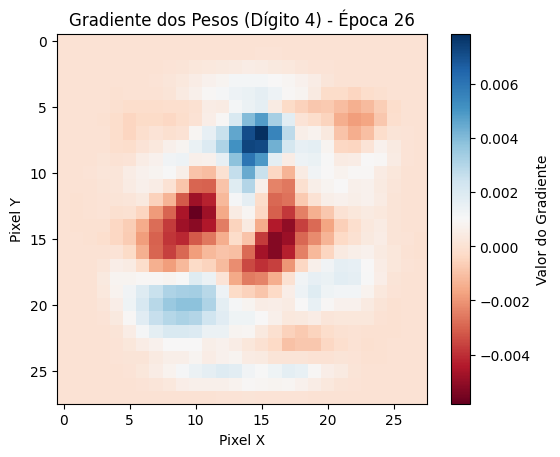

Epoch[27/100] | Loss: 0.530859 | Accuracy: 0.875700


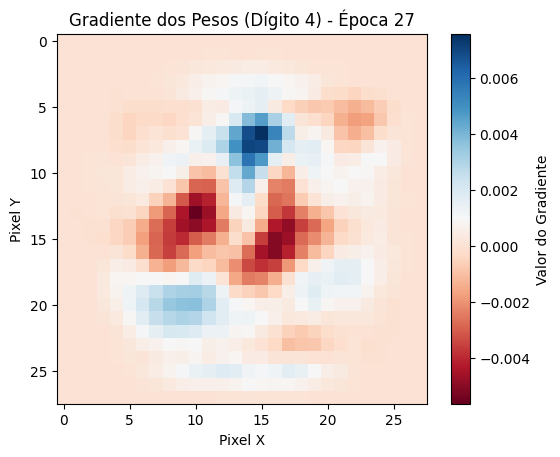

Epoch[28/100] | Loss: 0.524281 | Accuracy: 0.876900


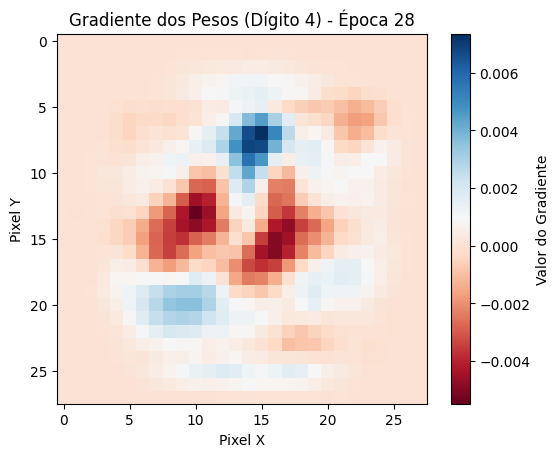

Epoch[29/100] | Loss: 0.518083 | Accuracy: 0.878000


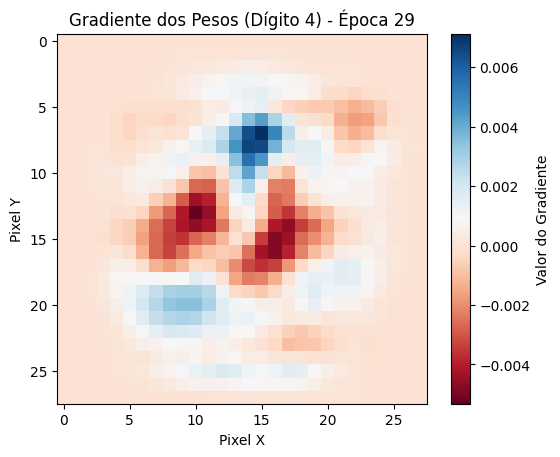

Epoch[30/100] | Loss: 0.512229 | Accuracy: 0.878800


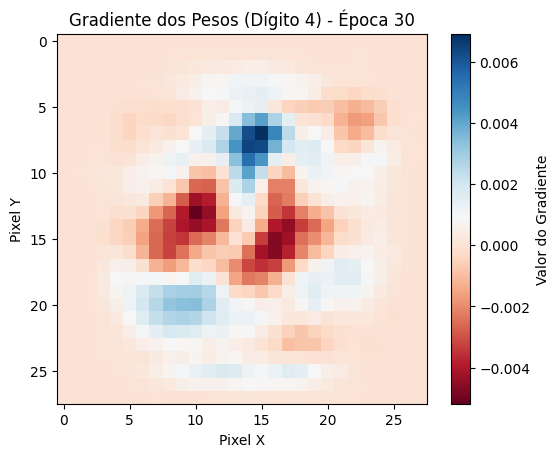

Epoch[31/100] | Loss: 0.506689 | Accuracy: 0.879600


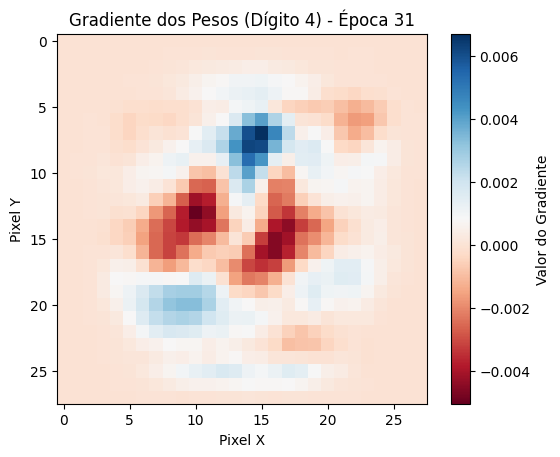

Epoch[32/100] | Loss: 0.501437 | Accuracy: 0.880300


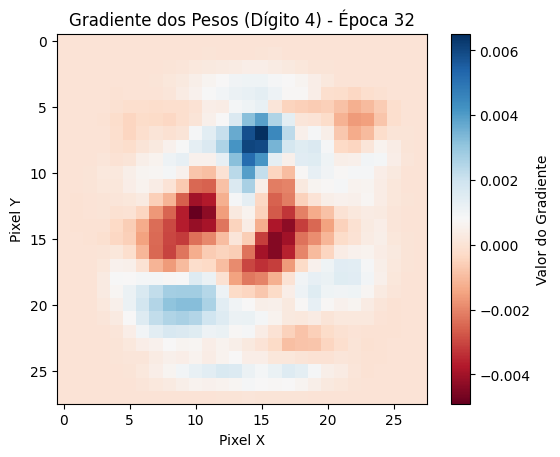

Epoch[33/100] | Loss: 0.496448 | Accuracy: 0.881100


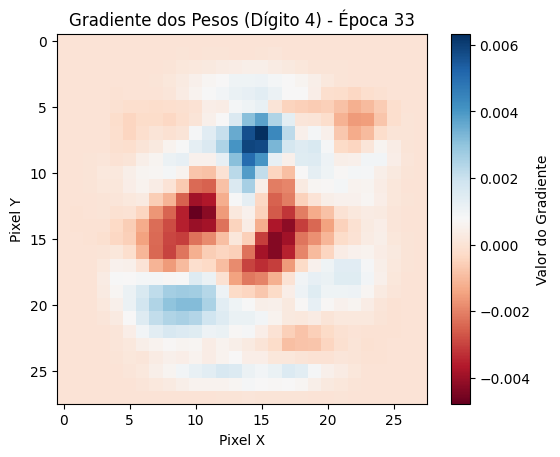

Epoch[34/100] | Loss: 0.491701 | Accuracy: 0.882100


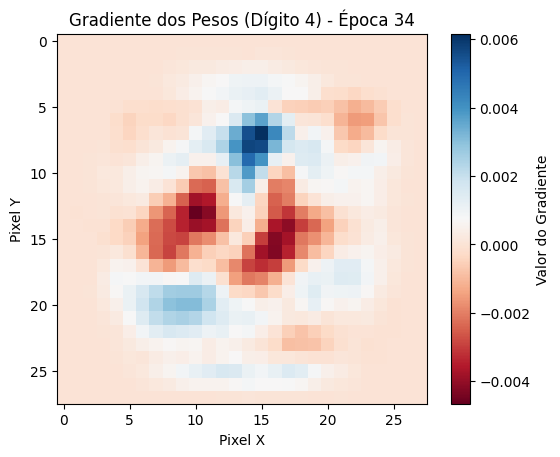

Epoch[35/100] | Loss: 0.487178 | Accuracy: 0.883200


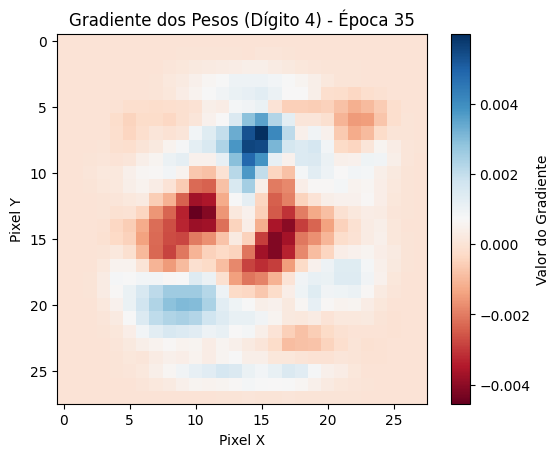

Epoch[36/100] | Loss: 0.482861 | Accuracy: 0.884200


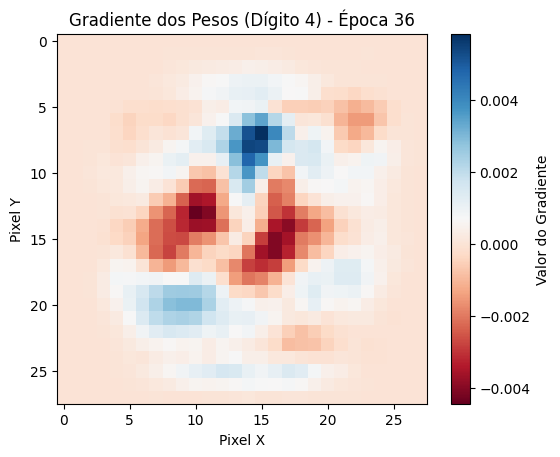

Epoch[37/100] | Loss: 0.478736 | Accuracy: 0.884500


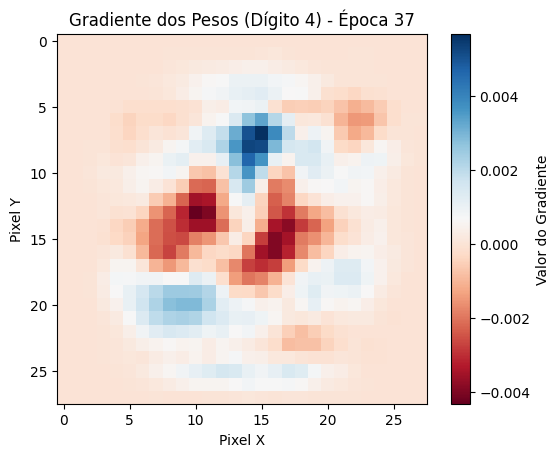

Epoch[38/100] | Loss: 0.474788 | Accuracy: 0.884800


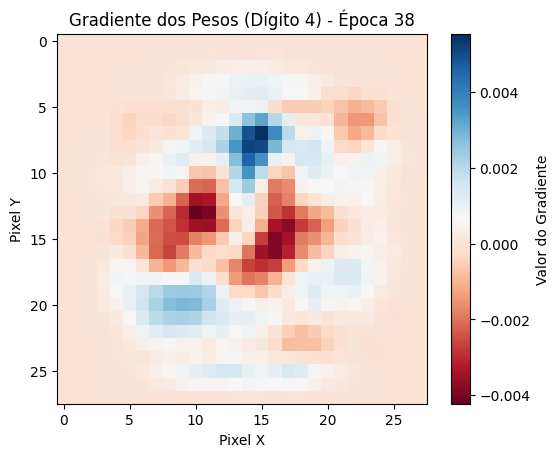

Epoch[39/100] | Loss: 0.471005 | Accuracy: 0.885300


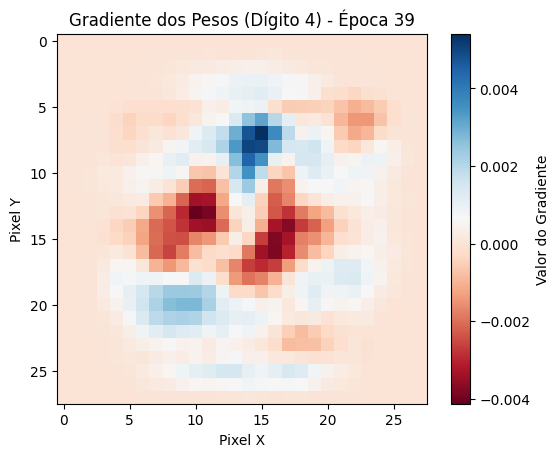

Epoch[40/100] | Loss: 0.467377 | Accuracy: 0.886100


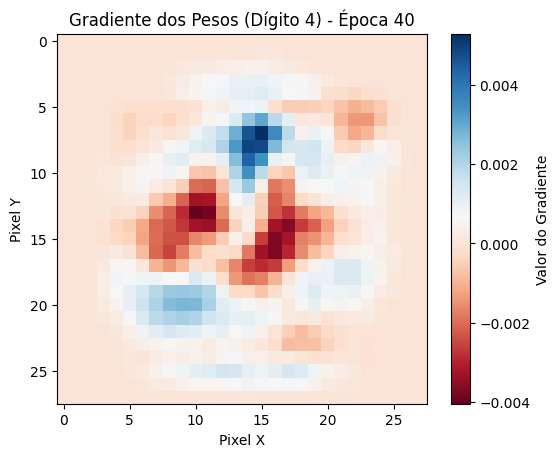

Epoch[41/100] | Loss: 0.463892 | Accuracy: 0.886300


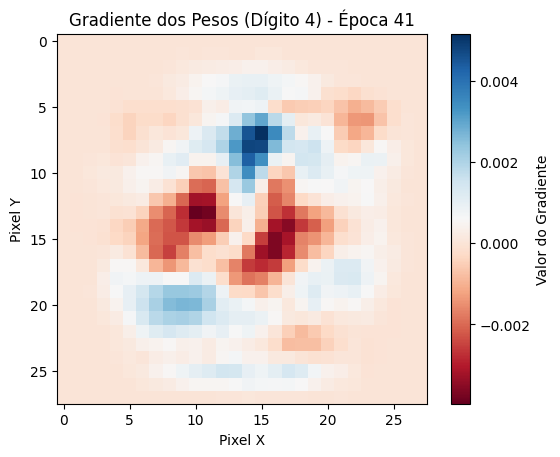

Epoch[42/100] | Loss: 0.460542 | Accuracy: 0.886600


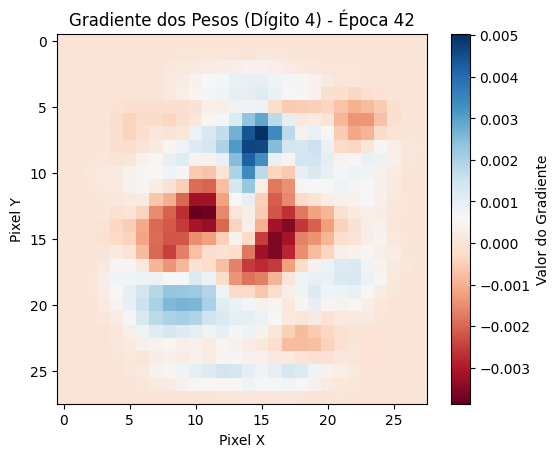

Epoch[43/100] | Loss: 0.457318 | Accuracy: 0.887300


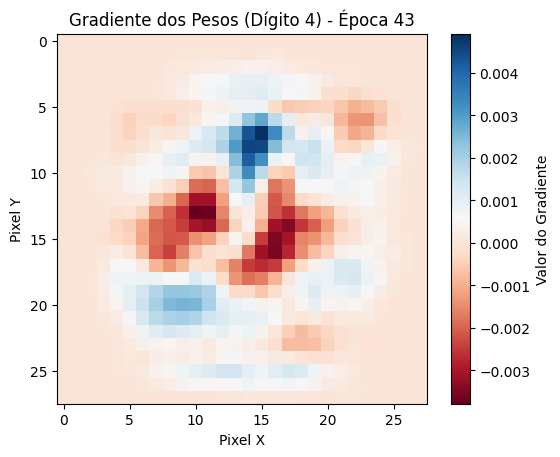

Epoch[44/100] | Loss: 0.454213 | Accuracy: 0.887700


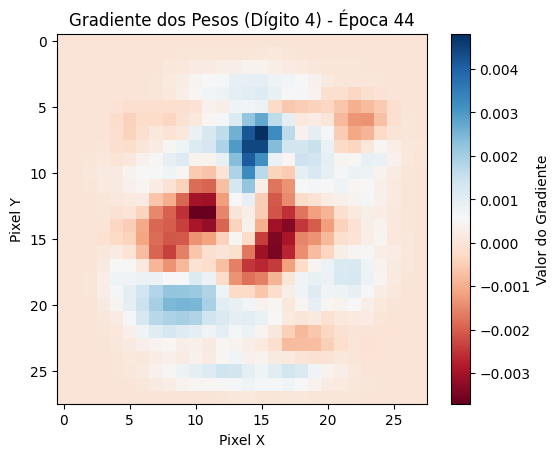

Epoch[45/100] | Loss: 0.451218 | Accuracy: 0.888300


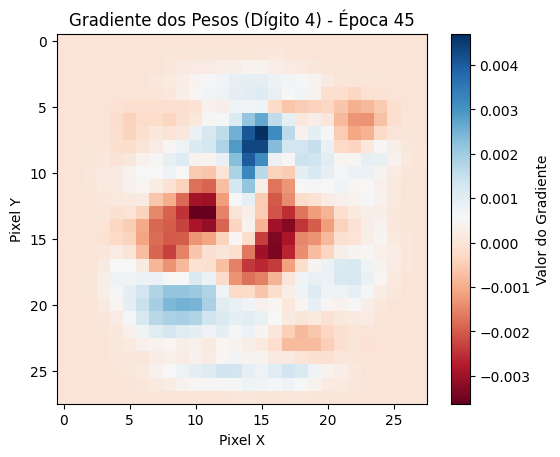

Epoch[46/100] | Loss: 0.448328 | Accuracy: 0.888600


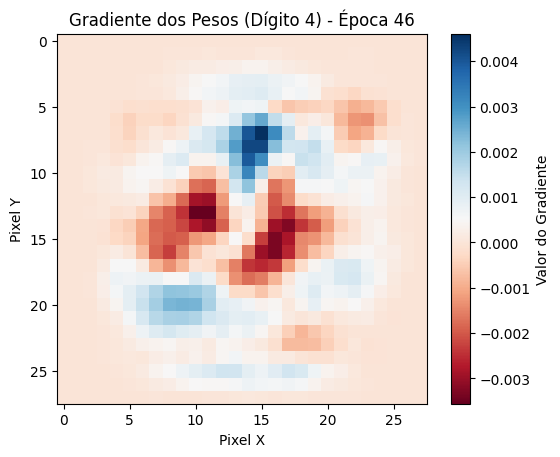

Epoch[47/100] | Loss: 0.445537 | Accuracy: 0.889000


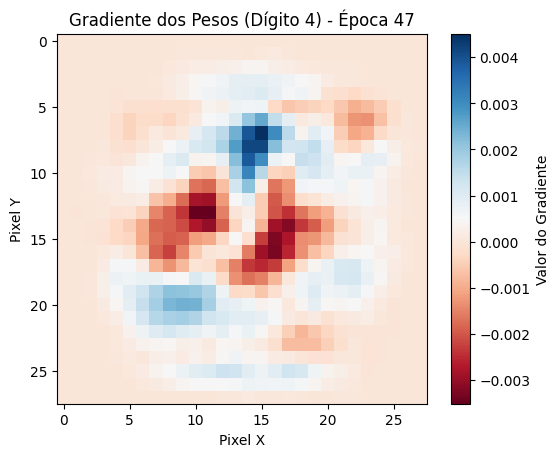

Epoch[48/100] | Loss: 0.442840 | Accuracy: 0.889600


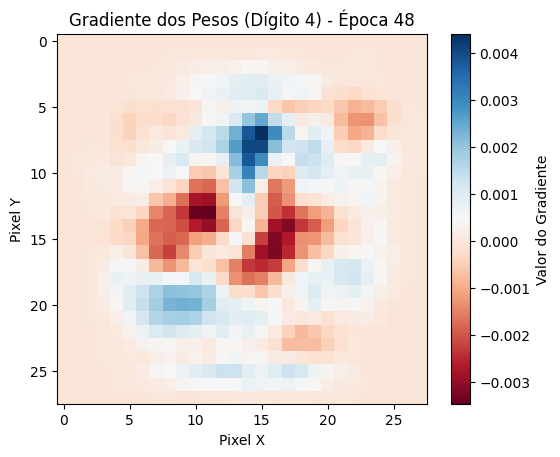

Epoch[49/100] | Loss: 0.440230 | Accuracy: 0.890000


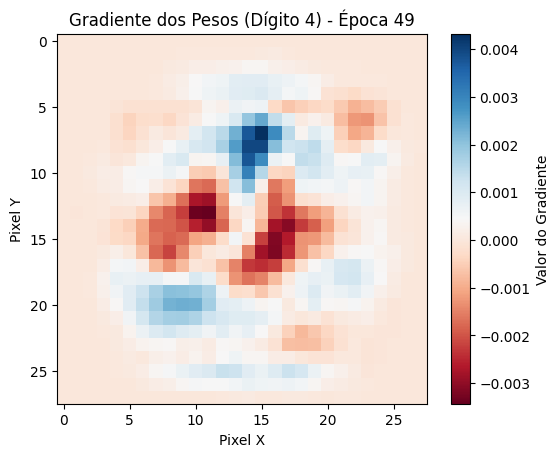

Epoch[50/100] | Loss: 0.437703 | Accuracy: 0.890700


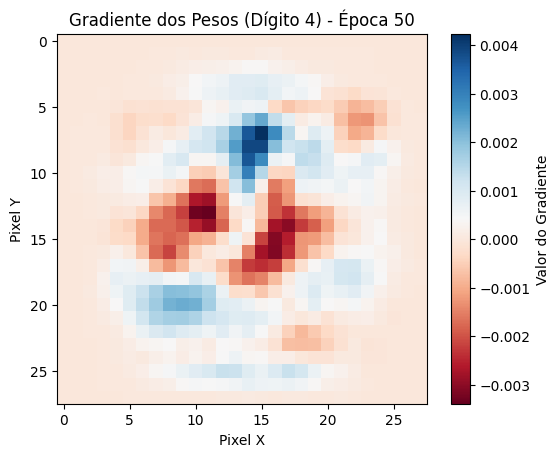

Epoch[51/100] | Loss: 0.435255 | Accuracy: 0.891000


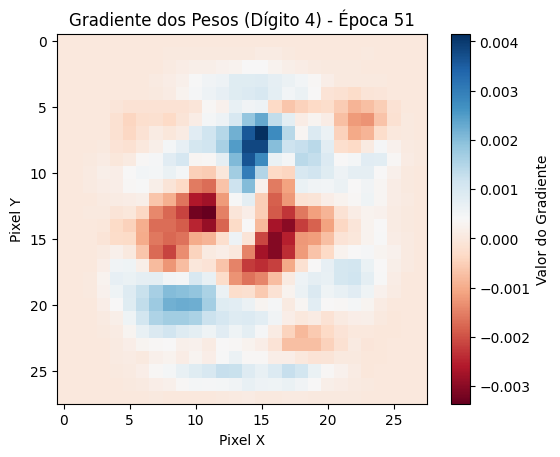

Epoch[52/100] | Loss: 0.432883 | Accuracy: 0.891500


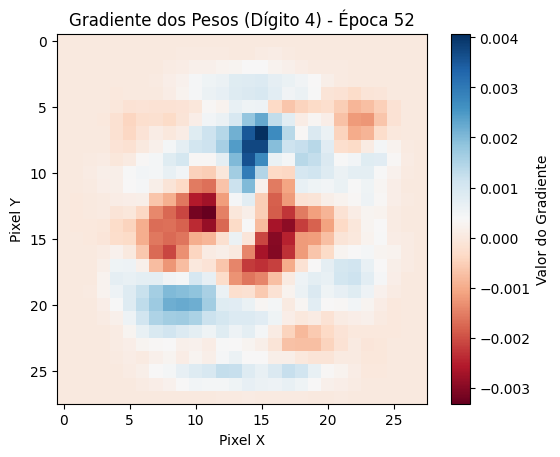

Epoch[53/100] | Loss: 0.430581 | Accuracy: 0.892100


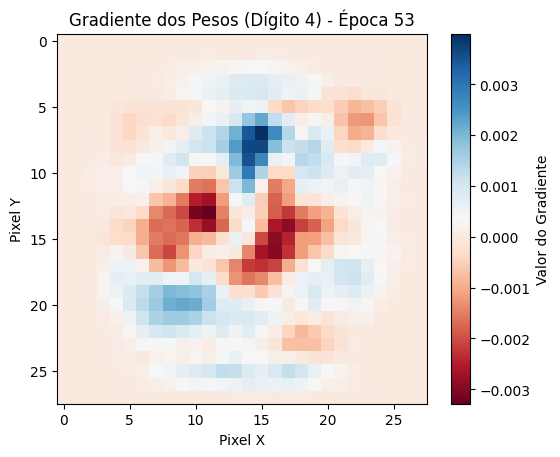

Epoch[54/100] | Loss: 0.428346 | Accuracy: 0.892500


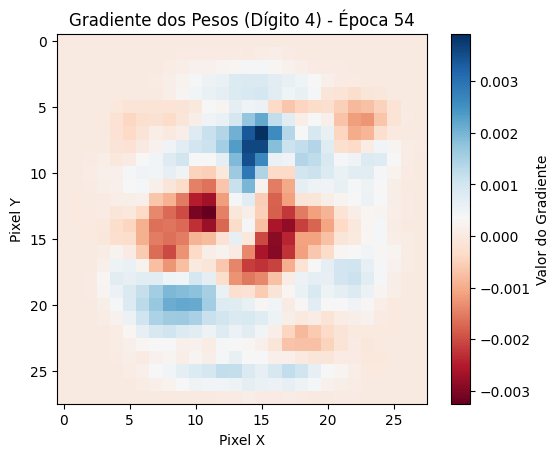

Epoch[55/100] | Loss: 0.426176 | Accuracy: 0.892700


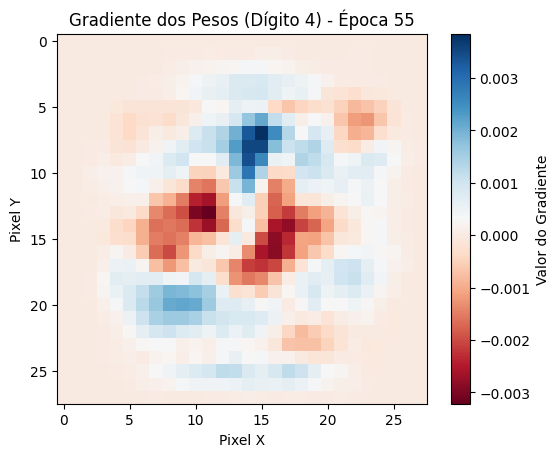

Epoch[56/100] | Loss: 0.424067 | Accuracy: 0.893000


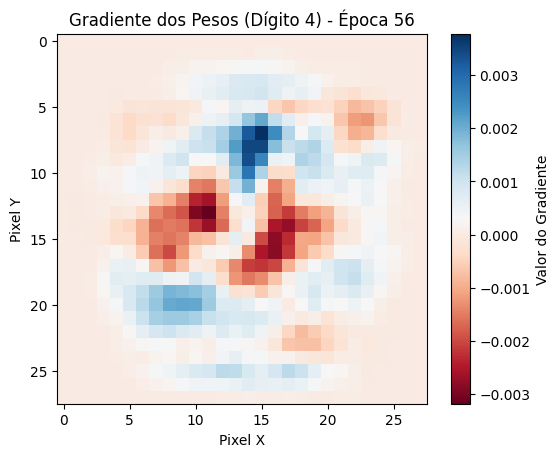

Epoch[57/100] | Loss: 0.422017 | Accuracy: 0.893500


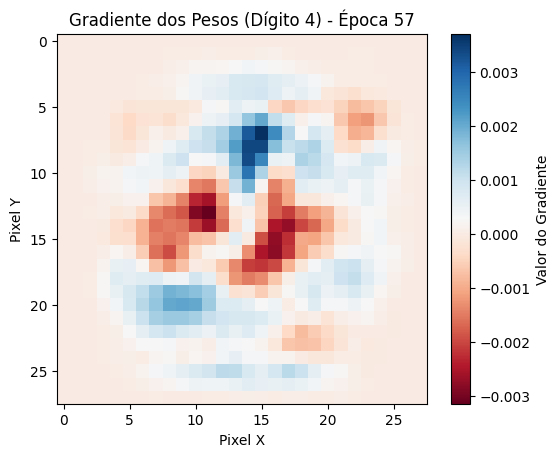

Epoch[58/100] | Loss: 0.420022 | Accuracy: 0.893900


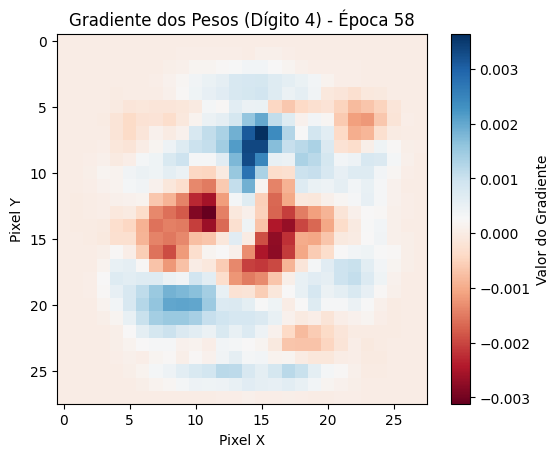

Epoch[59/100] | Loss: 0.418080 | Accuracy: 0.894600


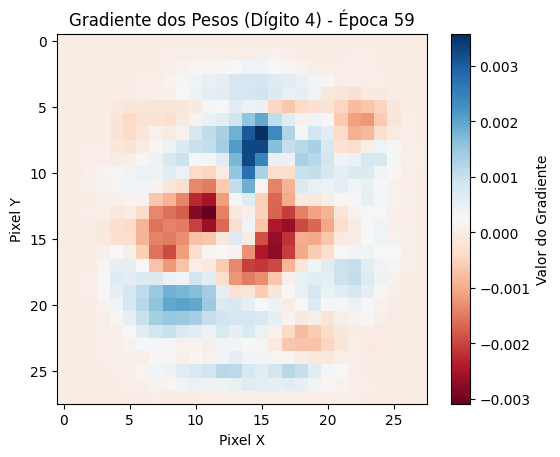

Epoch[60/100] | Loss: 0.416188 | Accuracy: 0.894900


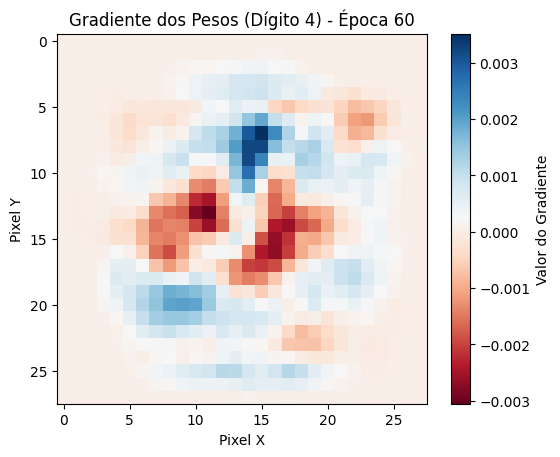

Epoch[61/100] | Loss: 0.414346 | Accuracy: 0.895100


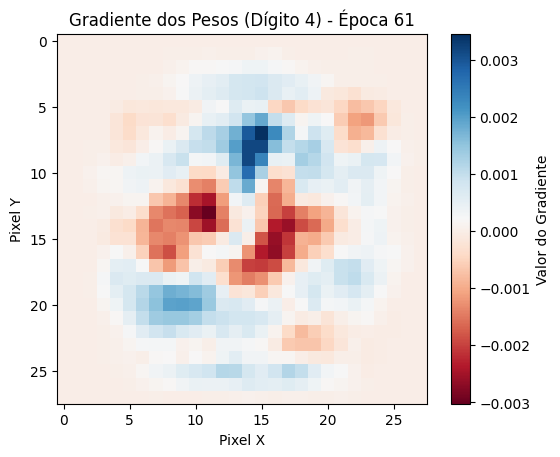

Epoch[62/100] | Loss: 0.412549 | Accuracy: 0.895700


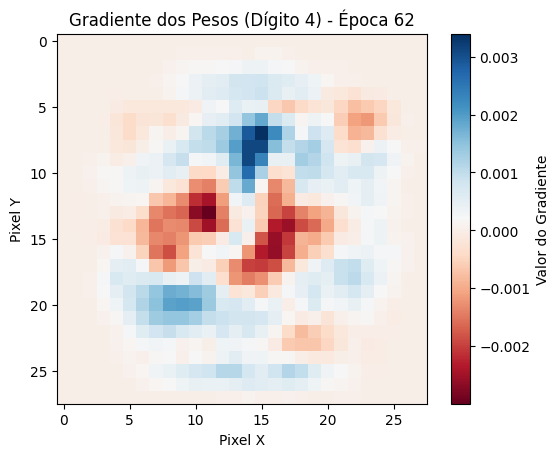

Epoch[63/100] | Loss: 0.410797 | Accuracy: 0.896000


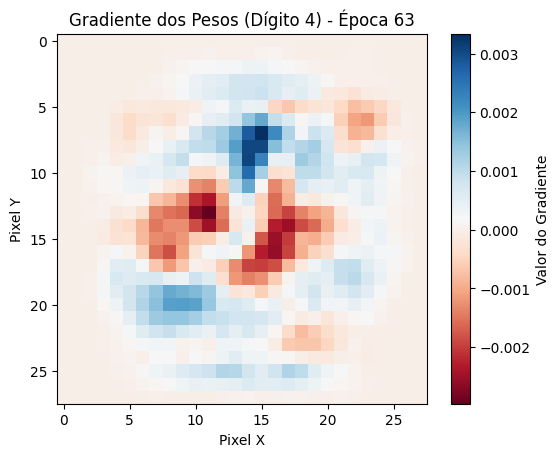

Epoch[64/100] | Loss: 0.409088 | Accuracy: 0.896200


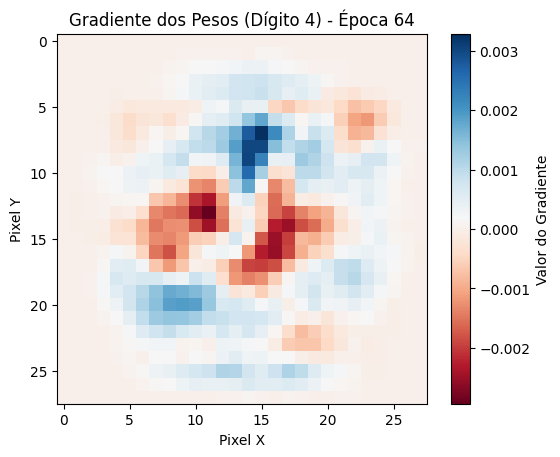

Epoch[65/100] | Loss: 0.407420 | Accuracy: 0.896600


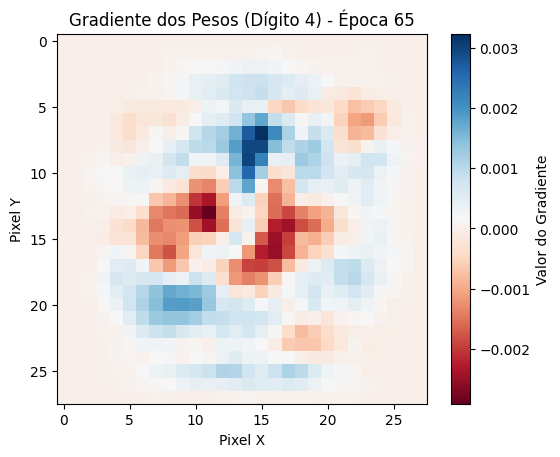

Epoch[66/100] | Loss: 0.405791 | Accuracy: 0.897000


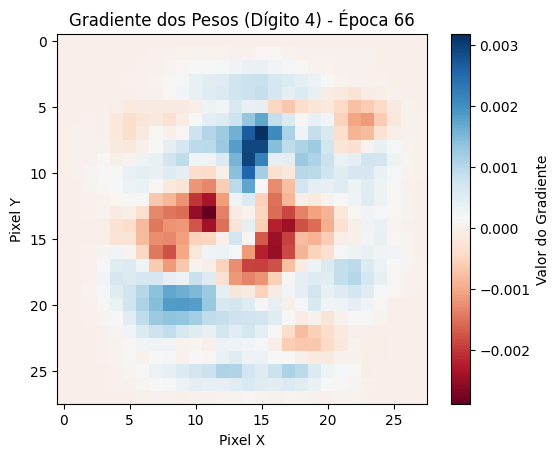

Epoch[67/100] | Loss: 0.404199 | Accuracy: 0.897100


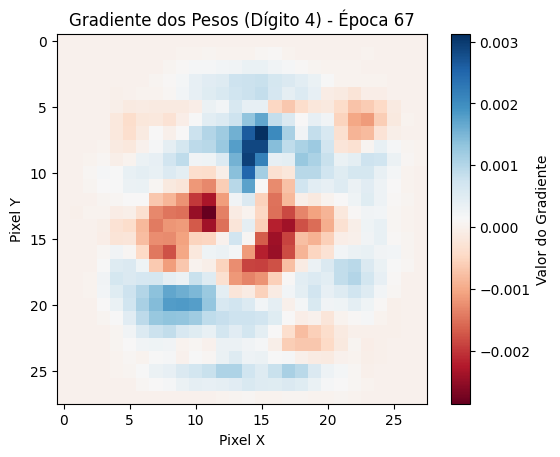

Epoch[68/100] | Loss: 0.402644 | Accuracy: 0.897200


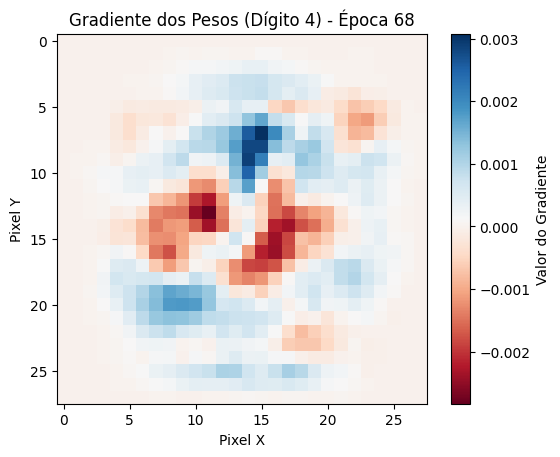

Epoch[69/100] | Loss: 0.401123 | Accuracy: 0.897400


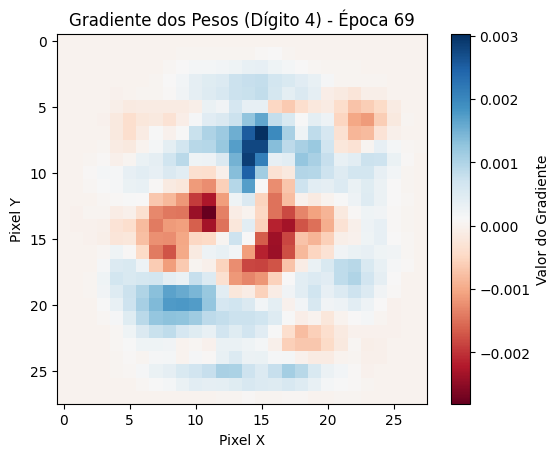

Epoch[70/100] | Loss: 0.399636 | Accuracy: 0.897700


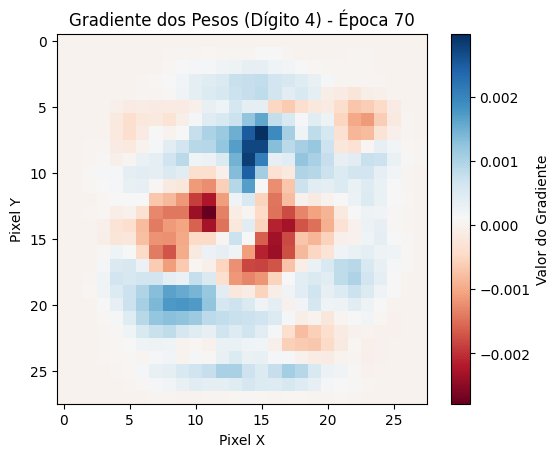

Epoch[71/100] | Loss: 0.398181 | Accuracy: 0.898000


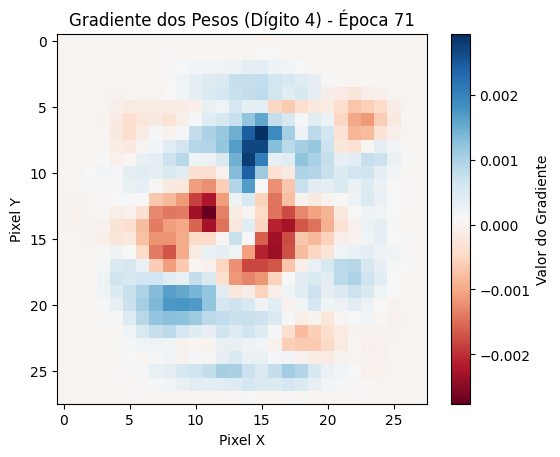

Epoch[72/100] | Loss: 0.396758 | Accuracy: 0.898300


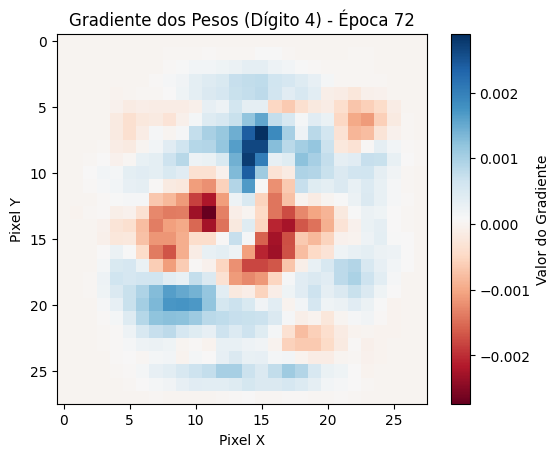

Epoch[73/100] | Loss: 0.395364 | Accuracy: 0.898700


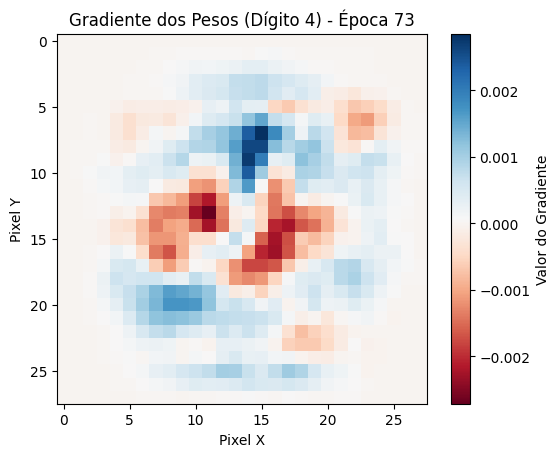

Epoch[74/100] | Loss: 0.393999 | Accuracy: 0.899100


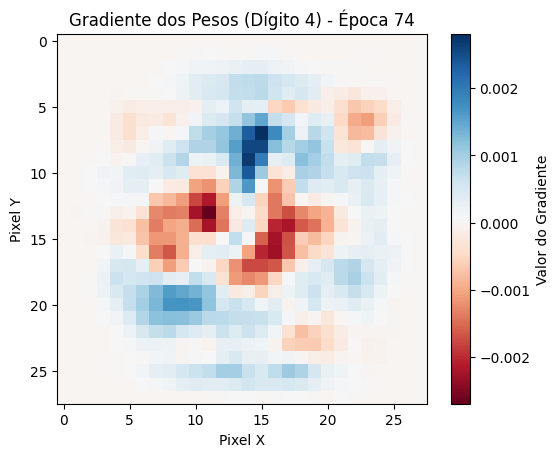

Epoch[75/100] | Loss: 0.392662 | Accuracy: 0.899400


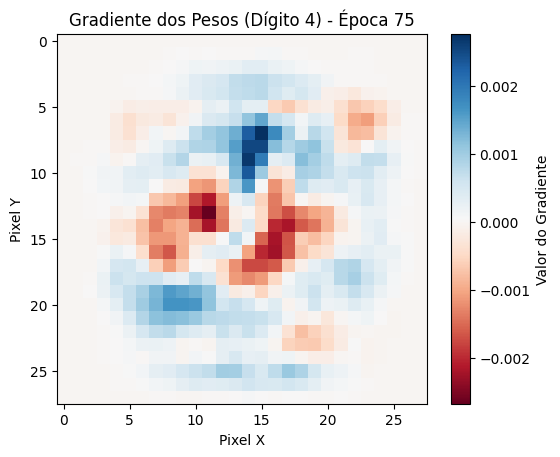

Epoch[76/100] | Loss: 0.391351 | Accuracy: 0.899500


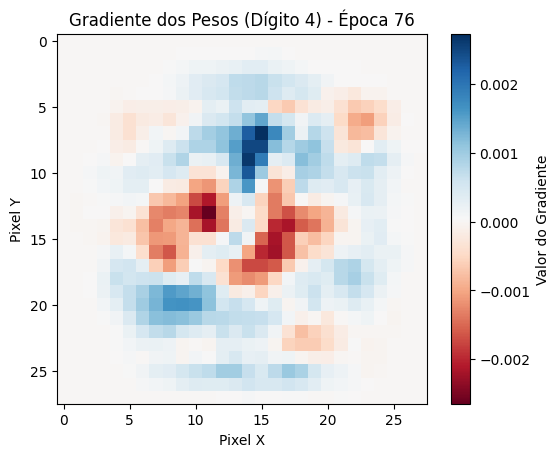

Epoch[77/100] | Loss: 0.390067 | Accuracy: 0.899600


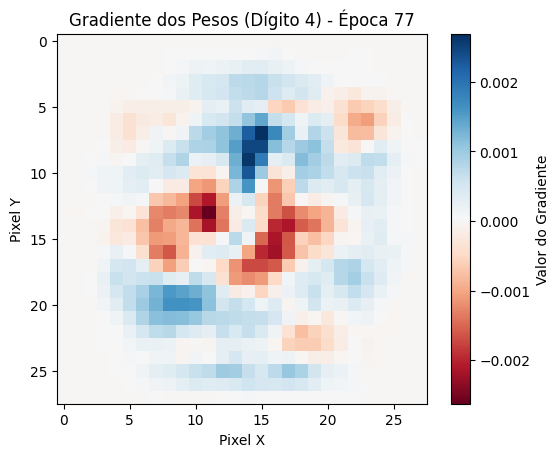

Epoch[78/100] | Loss: 0.388808 | Accuracy: 0.900300


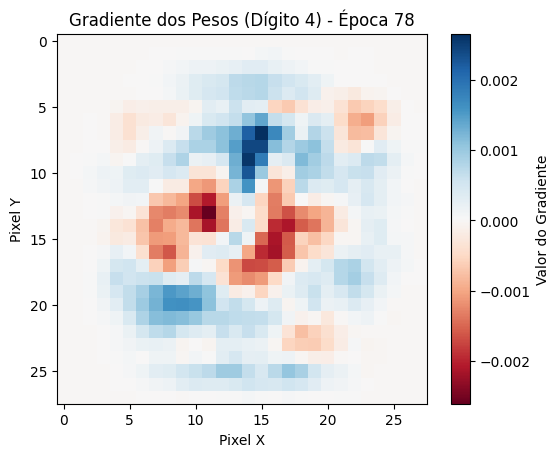

Epoch[79/100] | Loss: 0.387573 | Accuracy: 0.900400


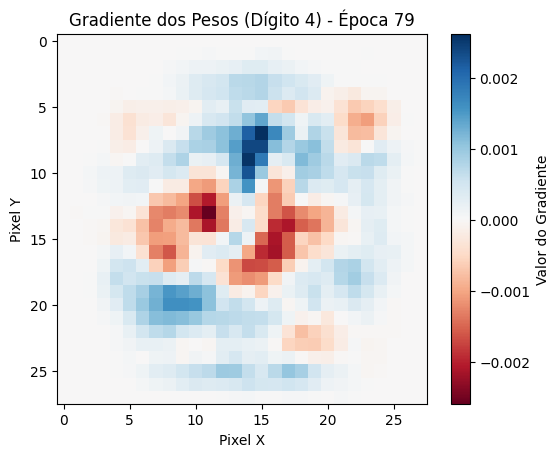

Epoch[80/100] | Loss: 0.386361 | Accuracy: 0.900700


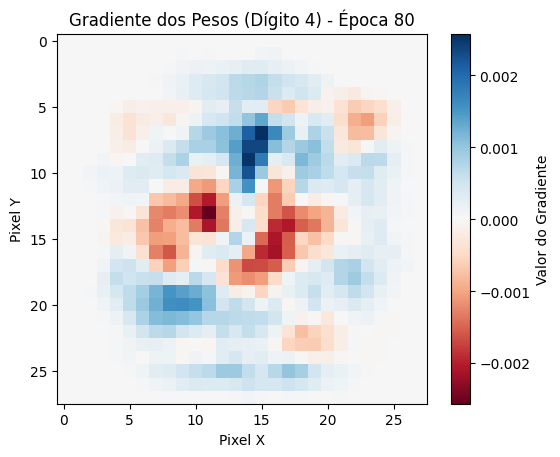

Epoch[81/100] | Loss: 0.385172 | Accuracy: 0.901200


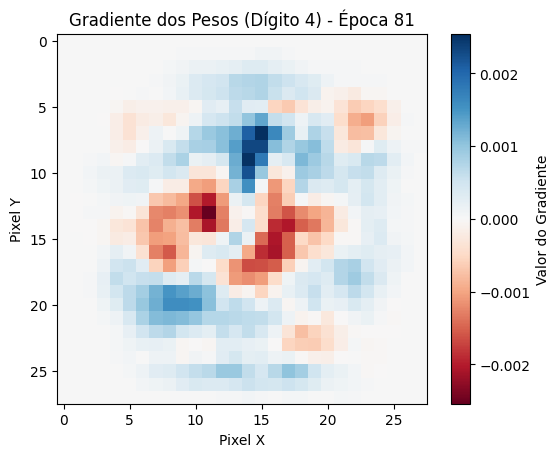

Epoch[82/100] | Loss: 0.384005 | Accuracy: 0.901400


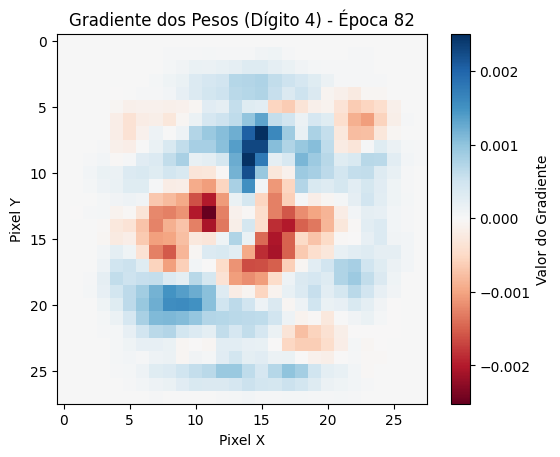

Epoch[83/100] | Loss: 0.382860 | Accuracy: 0.901500


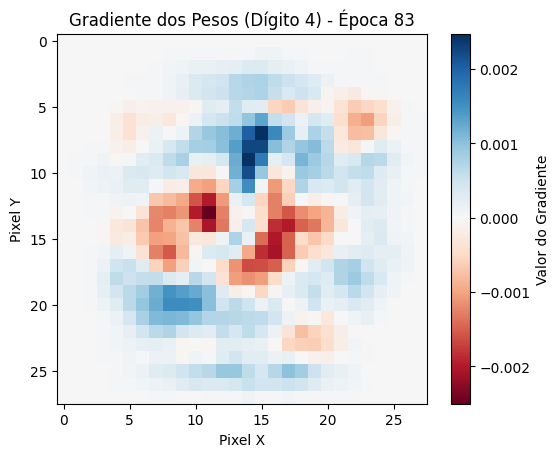

Epoch[84/100] | Loss: 0.381735 | Accuracy: 0.901500


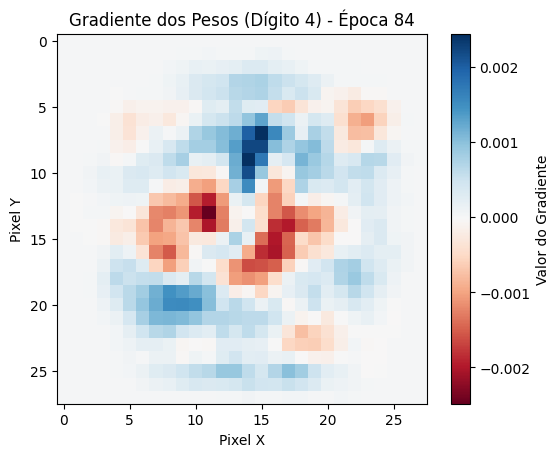

Epoch[85/100] | Loss: 0.380630 | Accuracy: 0.901500


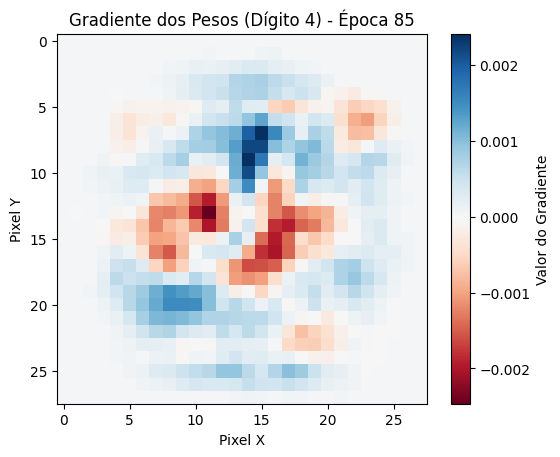

Epoch[86/100] | Loss: 0.379544 | Accuracy: 0.902100


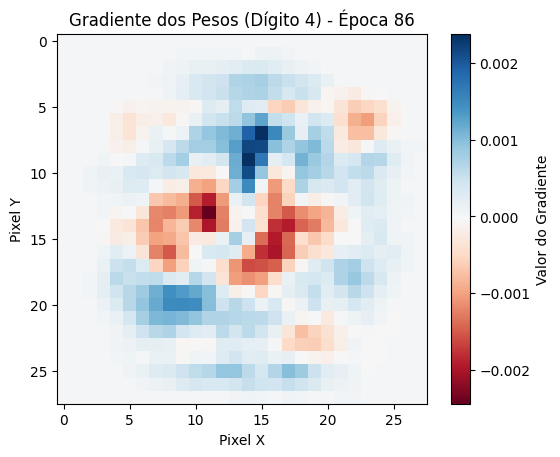

Epoch[87/100] | Loss: 0.378477 | Accuracy: 0.902500


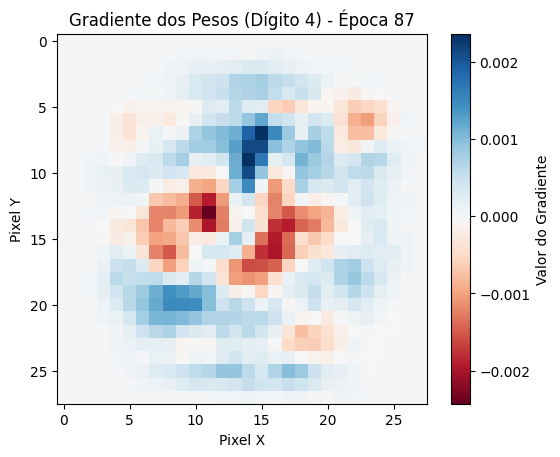

Epoch[88/100] | Loss: 0.377428 | Accuracy: 0.902800


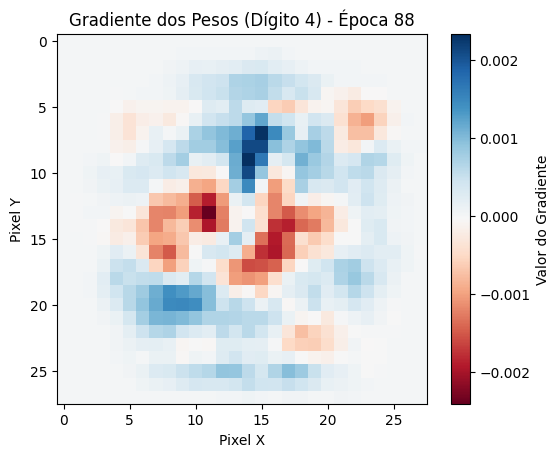

Epoch[89/100] | Loss: 0.376397 | Accuracy: 0.902700


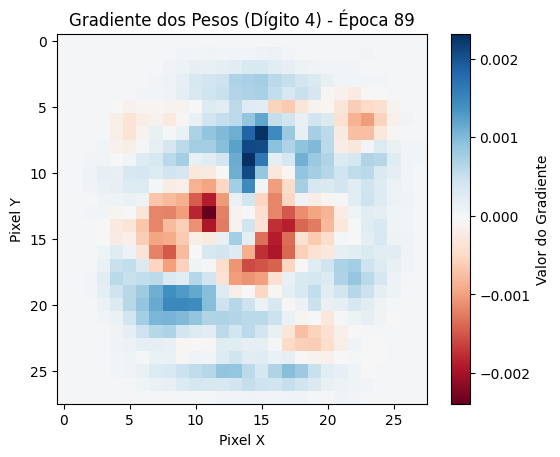

Epoch[90/100] | Loss: 0.375383 | Accuracy: 0.903100


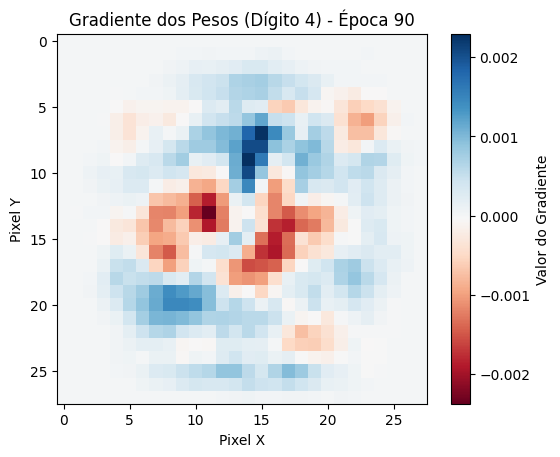

Epoch[91/100] | Loss: 0.374386 | Accuracy: 0.903300


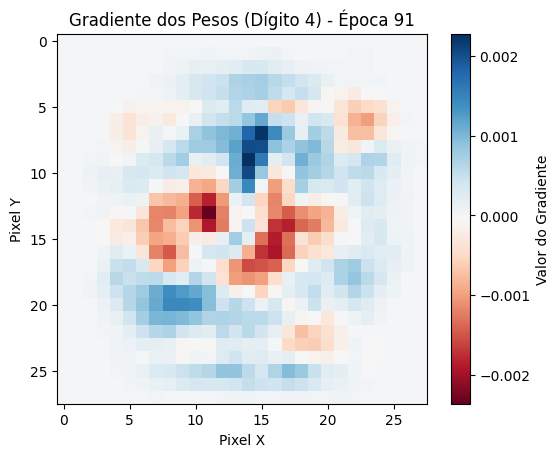

Epoch[92/100] | Loss: 0.373405 | Accuracy: 0.903500


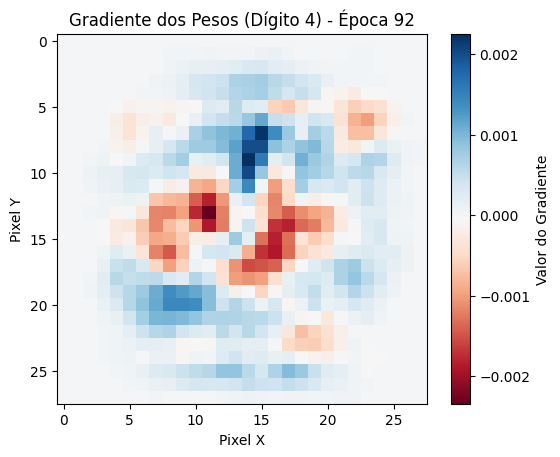

Epoch[93/100] | Loss: 0.372439 | Accuracy: 0.903700


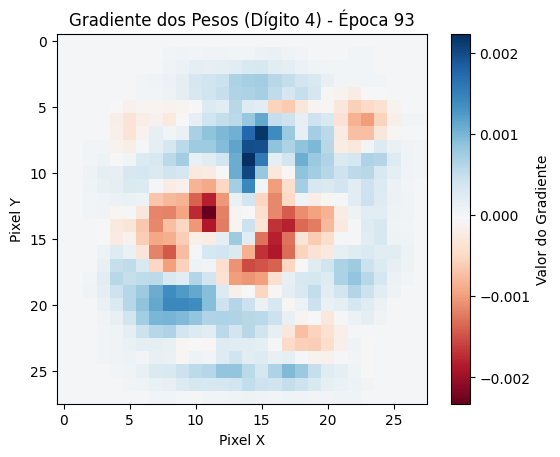

Epoch[94/100] | Loss: 0.371489 | Accuracy: 0.904000


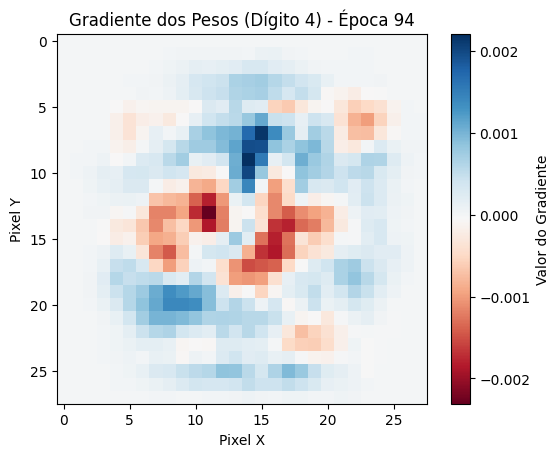

Epoch[95/100] | Loss: 0.370554 | Accuracy: 0.904100


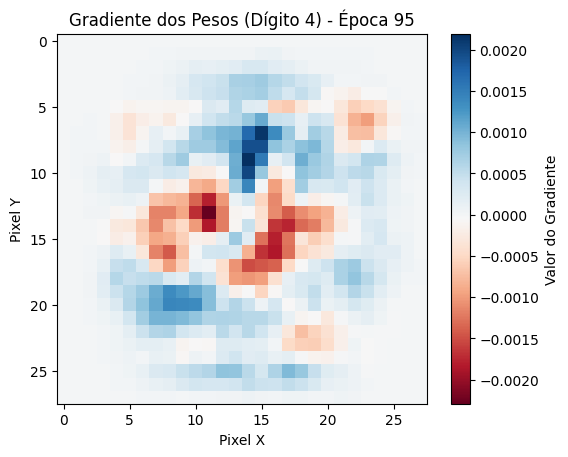

Epoch[96/100] | Loss: 0.369633 | Accuracy: 0.904500


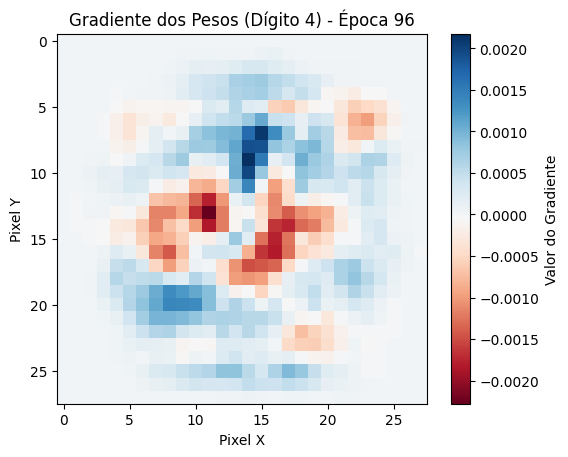

Epoch[97/100] | Loss: 0.368727 | Accuracy: 0.904500


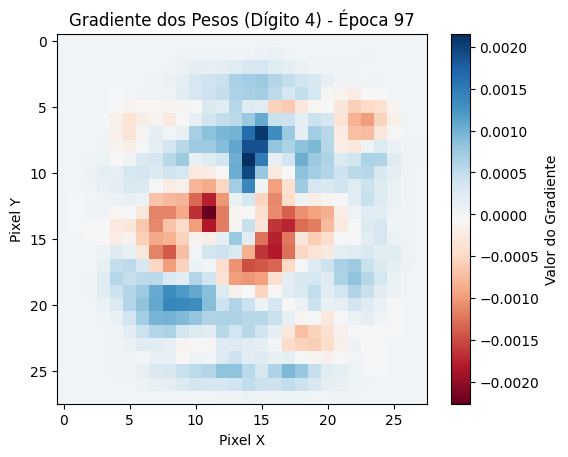

Epoch[98/100] | Loss: 0.367834 | Accuracy: 0.905000


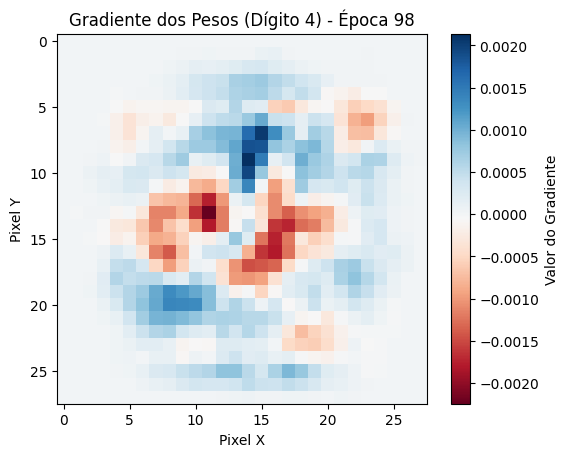

Epoch[99/100] | Loss: 0.366954 | Accuracy: 0.905000


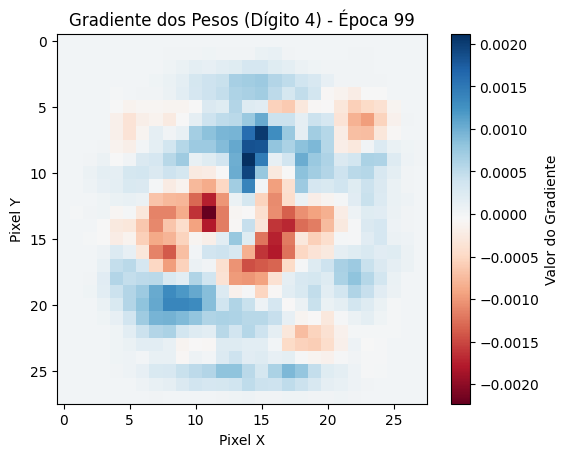

Epoch[100/100] | Loss: 0.366088 | Accuracy: 0.905100


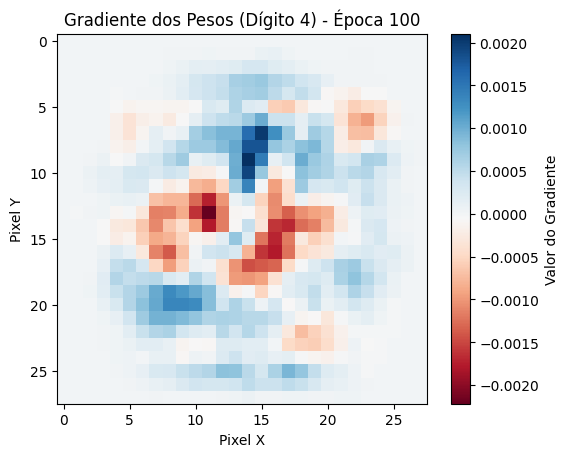

In [153]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = x_train.view(-1, 28 * 28)
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, y_train)

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    print('Epoch[{}/{}] | Loss: {:.6f} | Accuracy: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))

    gradient_digit_4 = model.weight.grad[4, :].detach().numpy()

    grad_image = gradient_digit_4.reshape(28, 28)

    plt.imshow(grad_image, cmap='RdBu')

    plt.title(f'Gradiente dos Pesos (Dígito 4) - Época {i+1}')
    plt.colorbar(label='Valor do Gradiente')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')

    plt.show()


In [154]:
print('Final loss:', loss.item())

Final loss: 0.366087943315506


### Visualizando gráfico de perda durante o treinamento

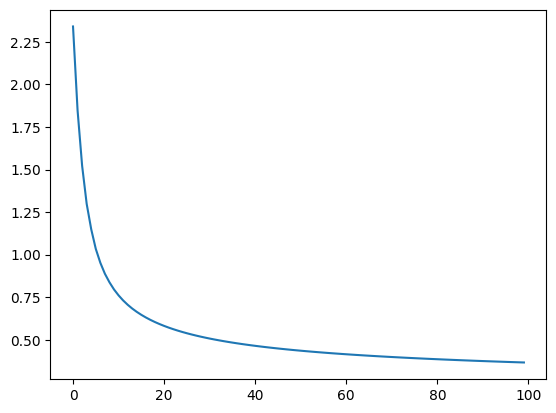

In [155]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [156]:
def predict(model, input_data):
    outputs = model(input_data)
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9057


### Matriz de confusão com dados de treinamento e teste

In [157]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,0,11,1,0,11,8,6,8,14
1,0,1092,17,11,7,8,3,17,20,6
2,2,6,869,25,10,8,8,15,16,5
3,4,3,11,897,0,45,1,1,22,17
4,1,1,16,1,898,21,5,17,5,23
5,5,10,4,39,0,706,14,0,23,6
6,7,2,15,9,15,17,966,0,18,2
7,2,3,13,16,3,1,0,977,6,31
8,7,9,28,15,5,32,9,4,809,3


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


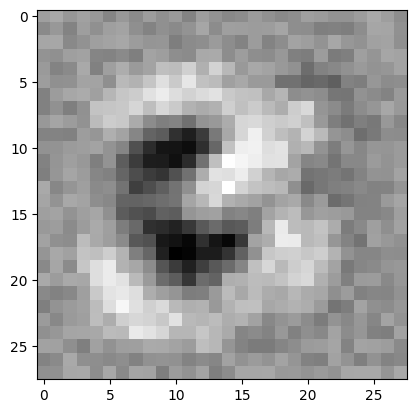

In [158]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

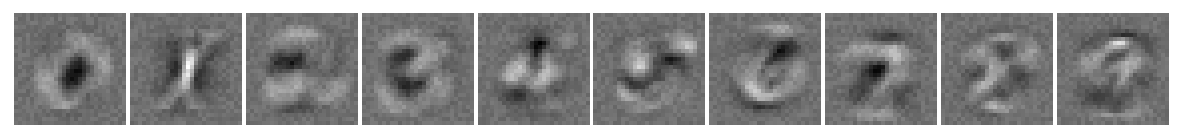

In [159]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = x_train.view(-1, 28 * 28)
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, y_train)

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
  - 10.000 x 784, considerando 10.000 como a quantidade de amostras
2. Qual é o shape da saída da rede?
  - 10.000 x 10, considerando 10.000 como a quantidade de amostras
3. Qual é o número total de parâmetros da rede, incluindo o bias?
  - 784 * 10 + 1 * 10 = 7850

# Aprendizados
